# Question 1
In this question, we are asked to:
 1. Implement a function to generate binomial samples using functions `numpy.random.choice`, `numpy.sum` and `numpy.array`.
 2. Calculate Variance and Expection of generated samples.
 3. Compare the calculated values with expected values for binomial distribution and draw their plots.

## Importing necessary libraries and creating variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import poisson, norm, binom

green = '#57cc99'
red = '#e56b6f'
blue = '#22577a'
yellow = '#ffca3a'
purple = '#6a4c93'

line_thickness = 3

## Defining the function
Let's define the function and call it `binomial`:

In [2]:
def binomial(n, p, test_times):
    return np.sum(np.reshape(np.array(np.random.choice(2, n * test_times, p=[1 - p, p])), (test_times, n)), axis=1)

Now let's calculated expected parameters and draw their plots $\forall p \in \set{0.00, 0.01, 0.02, ..., 0.99, 1.00}$:

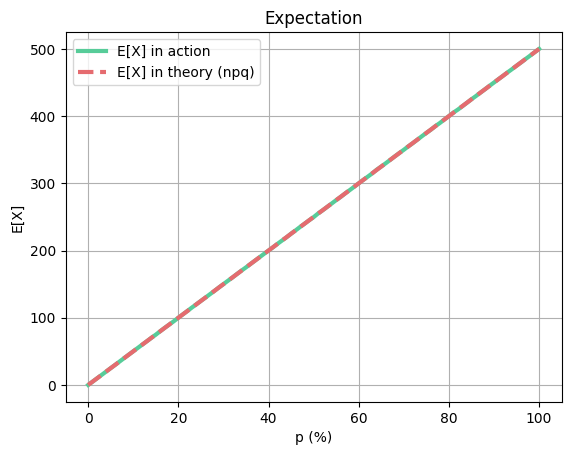

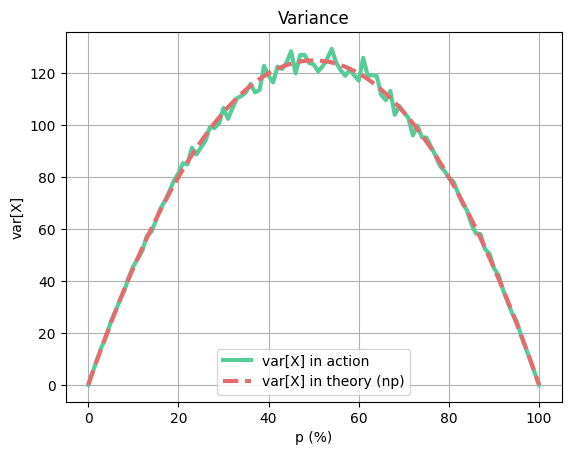

In [3]:
n = 500
m = 5000
exp_in_action = []
exp_in_theory = []
var_in_action = []
var_in_theory = []
for p in range(101):
    p /= 100
    q = 1 - p
    sample = binomial(n, p, m)
    exp_in_action.append(np.mean(sample))
    exp_in_theory.append(n * p)
    var_in_action.append(np.var(sample))
    var_in_theory.append(n * p * q)

plt.title("Expectation")
x_values = range(101)
plt.xlabel("p (%)")
plt.ylabel("E[X]")
plt.plot(x_values, exp_in_action, color=green, label="E[X] in action", linewidth=line_thickness)
plt.plot(x_values, exp_in_theory, color=red, label="E[X] in theory (npq)", linestyle='--', linewidth=line_thickness)
plt.legend()
plt.grid(True)
plt.show()

plt.title("Variance")
plt.xlabel("p (%)")
plt.ylabel("var[X]")
plt.plot(x_values, var_in_action, color=green, label="var[X] in action", linewidth=line_thickness)
plt.plot(x_values, var_in_theory, color=red, label="var[X] in theory (np)", linestyle='--', linewidth=line_thickness)
plt.legend()
plt.grid(True)
plt.show()

As you can see, the expected mean and real mean are the same, but expected variance is a little bit different from $npq$.

This is because as $p \to 0.5$, the success times happen to be sometimes less and sometimes more spread out, leading to a difference between expected variance and calculated variance. However, if we increase the number of trials of the binomial distribution, these plots happen to fit each other.

# Question 2

This question wants us to perdict a binomial trial with poisson and normal distributions.

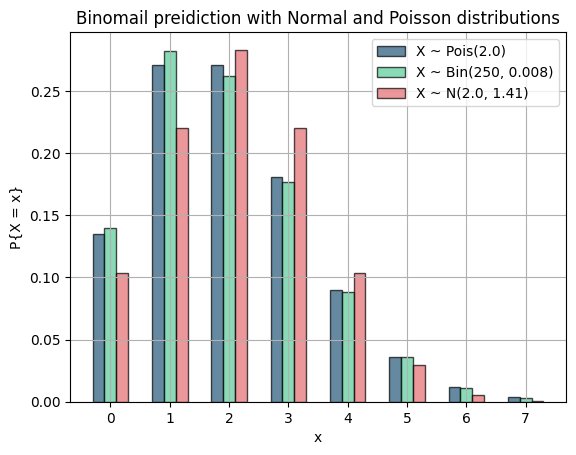

In [4]:
n = 250
p = 0.008
q = 1 - p
mu = n * p
sigma = (n * p * q)**0.5
m = 5000

width = 0.2

x_values = np.arange(0, 8)

binomial_samples = np.random.binomial(n, p, m)
binomial_probs = [np.sum(binomial_samples == x) / m for x in x_values]
poisson_pmf = poisson.pmf(x_values, mu)
normal_pdf = norm.pdf(x_values, mu, sigma)

fig, ax = plt.subplots()

ax.bar(x_values - width, poisson_pmf, width, label='X ~ Pois({})'.format(mu), color=blue, alpha=0.7, edgecolor='black')
ax.bar(x_values, binomial_probs, width, label='X ~ Bin({}, {})'.format(n, p), color=green, alpha=0.7, edgecolor='black')
ax.bar(x_values + width, normal_pdf, width, label='X ~ N({}, {:.2f})'.format(mu, sigma), color=red, alpha=0.7, edgecolor='black')

ax.set_xticks(x_values)
ax.set_xlabel('x')
ax.set_ylabel('P{X = x}')
ax.set_title("Binomail preidiction with Normal and Poisson distributions")
ax.legend()
plt.grid(True)
plt.show()

As you can see, the poisson distribution is a much better prediction for our binomial trial because $p \to 0$. Because as $n \to \infty$, $p \to 0$ and $np \to \lambda$:

$\lim_{n \to \infty,\space p \to 0,\space np \to \lambda} \binom{n}{k}p^nq^{n-k} = e^{-\lambda}\frac{\lambda^k}{k!}$

Normal distribution is better when $p \to 0.5$ (that we'll eventually see in question 4).

# Question 3
In this question, we are asked to find some values such that their $\text{CDF}$ is a specific value.

**Note**: The `norm_cdf_bs` function uses binary search to find $x \text{ s.t PDF(x) = k}$.

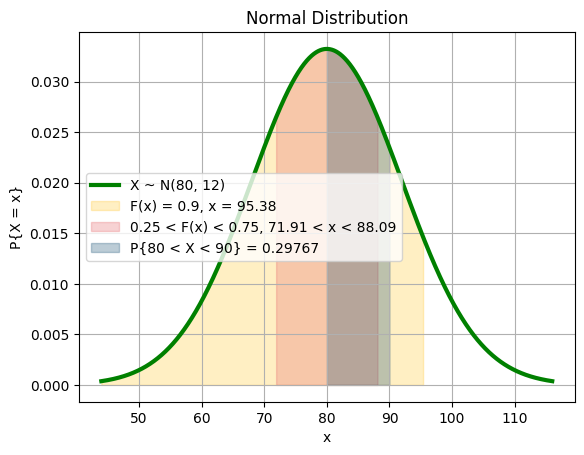

In [5]:
def norm_cdf_bs(mu, sigma, cdf):
    l, r = 0, mu + 2000
    while (r - l > 0.001):
        mid = (l + r) / 2
        if (norm.cdf((mid - mu) / sigma) > cdf):
            r = mid
        else:
            l = mid
    return (r + l) / 2

mu = 80
sigma = 12
min_grade = norm_cdf_bs(mu, sigma, 0.9)

x = np.arange(mu - 3 * sigma, mu + 3 * sigma, 0.01)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color="green", label="X ~ N({}, {})".format(mu, sigma), linewidth=line_thickness)    
plt.fill_between(x, y, where=(x < min_grade), color=yellow, alpha=0.3, label="F(x) = 0.9, x = {:.2f}".format(min_grade))

second_forth_start = norm_cdf_bs(mu, sigma, 0.25)
third_forth_end = norm_cdf_bs(mu, sigma, 0.75)
plt.fill_between(x, y, where=(x < third_forth_end) & (x > second_forth_start), color=red, alpha=0.3, label="0.25 < F(x) < 0.75, {:.2f} < x < {:.2f}".format(second_forth_start, third_forth_end))

plt.fill_between(x, y, where=(x < 90) & (x > 80), color=blue, alpha=0.3, label="P{{80 < X < 90}} = {:.5f}".format(norm.cdf((90 - mu) / sigma) - norm.cdf((80 - mu) / sigma)))

plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel("P{X = x}")
plt.legend()
plt.grid(True)
plt.show()

As we can see, the values in the center have more weights than values on the sides.

# Question 3 - Bonus part
In this question, we are asked to sum 3 random variables and show that it approaches to normal distribution. Let's form our random variables samples and draw their plots:

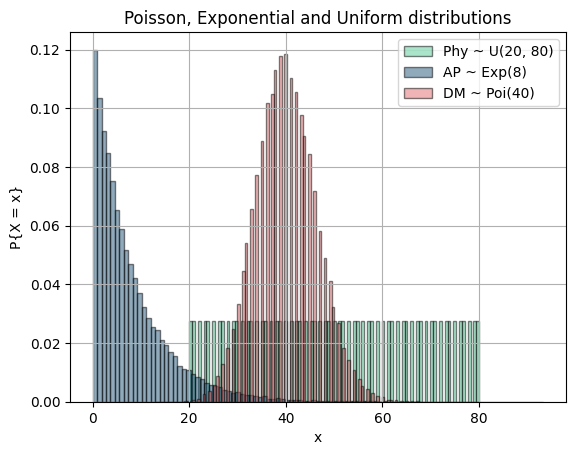

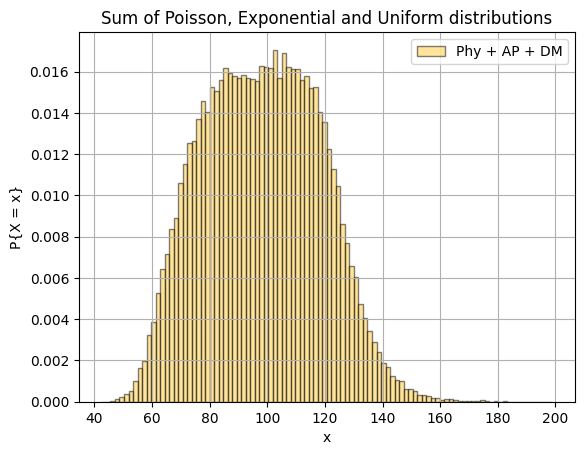

In [6]:
l, r = 20, 80 + 1
repetition = 1000

size = (r - l) * repetition

physics = []
for x in range(l, r):
    for t in range(repetition):
        physics.append(x)

plt.hist(physics, 101, density=True, color=green, label="Phy ~ U({}, {})".format(l, r - 1), alpha=0.5, edgecolor='black')

lamb = 8
ap = np.random.exponential(lamb, size=size)
plt.hist(ap, 101, density=True, color=blue, label="AP ~ Exp({})".format(lamb), alpha=0.5, edgecolor='black')

lamb = 40
dm = np.random.poisson(lamb, size=size)
plt.hist(dm, 101, density=True, color=red, label="DM ~ Poi({})".format(lamb), alpha=0.5, edgecolor='black')

plt.title("Poisson, Exponential and Uniform distributions")
plt.xlabel("x")
plt.ylabel("P{X = x}")
plt.legend()
plt.grid(True)
plt.show()

plt.hist(np.sum([physics, ap, dm], axis=0), 100, density=True, color=yellow, label="Phy + AP + DM", alpha=0.5, edgecolor='black')

plt.title("Sum of Poisson, Exponential and Uniform distributions")
plt.xlabel("x")
plt.ylabel("P{X = x}")
plt.legend()
plt.grid(True)
plt.show()

Even though our 3 random variables varied in mean and variance, the product of their sum approaches to normal distribution. This is called the **Central Limit Theorem**.

The parameters of the normal distribution can be calculated as:

$E[X] = E[Phy + AP + DM] = E[Phy] + E[AP] + E[DM] = 50 + 0.125 + 40 = 90.125$

$var[X] = E[X^2] - E^2[X]$

$var[Phy] = E[Phy^2] - E^2[Phy] \Rightarrow 300 = E[Phy^2] - 50^2 \Rightarrow E[Phy^2] = 2800$

$var[AP] = E[AP^2] - E^2[AP] \Rightarrow 0.015625 = E[AP^2] - (0.125)^2 \Rightarrow E[AP^2] = 0.03125$

$var[DM] = E[DM^2] - E^2[DM] \Rightarrow 40 = E[DM^2] - 40^2 \Rightarrow E[DM^2] = 1640$

$E[X^2] = E[(Phy + AP + DM)^2] = E[Phy^2] + E[AP^2] + E[DM^2] + 2(E[Phy*AP] + E[Phy*DM] + E[AP*DM])$

We know that when $X$ and $Y$ are independent:

$E[XY] = E[X] * E[Y]$

So, applying that rule to our equation:

$E[X^2] = 2800 + 0.03125 + 1640 + 2*(50 * 0.125 + 50 * 40 + 0.125 * 40) \simeq 8462.5$

So:

$var[X] = E[X^2] - E^2[X] = 8476.5 - 90.125^2 \simeq 354$

So, now we can say that:

$X \sim N(90.125, 18.8)$

Let's draw it's plot to see if it's anything close to the yellow histogram:

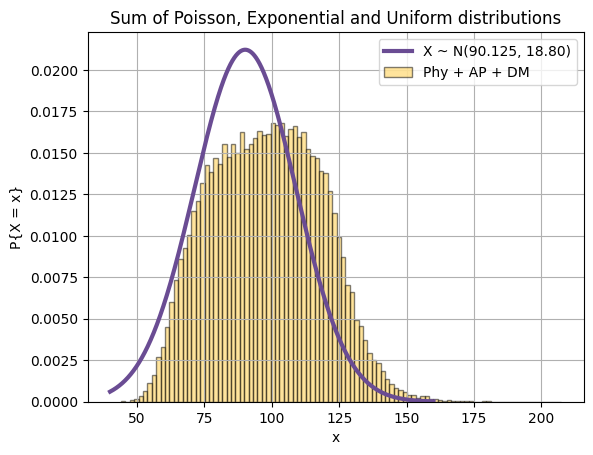

In [7]:
physics = []
for x in range(l, r):
    for t in range(repetition):
        physics.append(x)
ap = np.random.exponential(8, size=size)
dm = np.random.poisson(40, size=size)

mu = 90.125
sigma = 18.8
x = np.arange(40, 160, 0.01)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color=purple, label="X ~ N({}, {:.2f})".format(mu, sigma), linewidth=line_thickness)
plt.hist(np.sum([physics, ap, dm], axis=0), 100, density=True, color=yellow, label="Phy + AP + DM", alpha=0.5, edgecolor='black')

plt.title("Sum of Poisson, Exponential and Uniform distributions")
plt.xlabel("x")
plt.ylabel("P{X = x}")
plt.legend()
plt.grid(True)
plt.show()

Actually that is not what I thought I would get and I'm not gonna remove it. Probably some calculation mistakes done by me. Nevermind.

# Question 4
This question is exactly like question 2 but with different numbers, and this time, $p \to 0.5$.

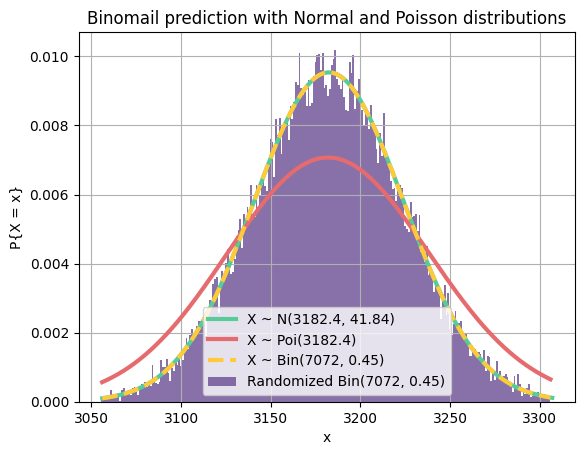

In [8]:
def draw_norm(mu, sigma, l, r):
    x = np.arange(l, r, 0.01)
    y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
    plt.plot(x, y, color=green, label="X ~ N({}, {:.2f})".format(mu, sigma), linewidth=line_thickness)

def draw_pois(lamb, l, r):
    x = np.arange(l, r, 1)
    y = poisson.pmf(x, lamb)
    plt.plot(x, y, color=red, label="X ~ Poi({})".format(lamb), linewidth=line_thickness)

def draw_bin(n, p, l, r):
    x = np.arange(l, r)
    plt.plot(x, binom.pmf(x, n, p), color=yellow, ms=8, label='X ~ Bin({}, {})'.format(n, p), linestyle='--', linewidth=line_thickness)

def draw_random_bin(n, p, size):
    data = np.random.binomial(n, p, size)
    num_bins = 50
    counts, bins = np.histogram(data, bins=num_bins)
    bins = bins[:-1] + (bins[1] - bins[0])/2
    probs = counts/float(counts.sum())
    plt.bar(bins, probs, 1.0/num_bins, color=blue, label="Randomized Bin({}, {})".format(n, p))

n = 7072
p = 0.45
q = 1 - p
mu = n * p
sigma = (n * p * q)**0.5
l = int(mu - 3 * sigma)
r = int(mu + 3 * sigma)
m = 30000

draw_norm(mu, sigma, l, r)
draw_pois(mu, l, r)
draw_bin(n, p, l, r)

data = np.random.binomial(n, p, m)
plt.hist(data, bins=np.arange(l, r) - 0.5, density=True, color=purple, label="Randomized Bin({}, {})".format(n, p), alpha=0.8)

plt.title("Binomail prediction with Normal and Poisson distributions")
plt.xlabel("x")
plt.ylabel("P{X = x}")
plt.legend()
plt.grid(True)
plt.show()

As you can see, normal distribution is a much better prediction for our binomial trial (purple). It also almost fits the binomial distribution plot. If we increase the number of trials, the purple area will get closer and closer to the area under the normal distribution curve.